> # **Udacity--毕业项目报告**       
> ### 报告作者：MingJun-Li

### 文件说明

代码主要包含4个开发用的ipython notebook
* exploration[1]和processing[1]是我初次的2份代码，一个是可视化的，一个是做处理的，不过第一次我做处理的时候用的是较为简单的3个单模型，最后提交的结果比较一般


* exploration with xgb[2]和xgb[3]是我后来实验的2个版本，其中xgb效果显著，取得了不错的成绩。

#### 因为2后两个改进版本都是做的比较简短的处理，所以分析主要是以我第一版本的代码为主。

# 一、定义

# 1.1项目概览

* ### 历史信息
Rossmann是欧洲的一家连锁药店，在7个欧洲国家拥有3,000家药店。 目前，罗斯曼店经理的任务是提前六周预测其日销量。 商店销售受到诸多因素的影响，包括促销，竞争，学校和国家假日，季节性和地点。 成千上万的个人经理根据其独特的情况预测销售量，结果的准确性可能会有很大的变化。

 Rossmann希望你能通过给出的数据来预测德国各地1,115家店铺的6周销量。  
 在此次项目中，我将模拟自己参加kaggle比赛，用train.csv来建模，之后用test.csv来预测，通过提交到 Kaggle来评估模型表现。

* ### 项目意义
可靠的销售预测使商店经理能够创建有效的员工时间表，从而提高生产力和动力，比如更好的调整供应链和合理的促销策略与竞争策略。 通过帮助Rossmann创建一个强大的预测模型，您将帮助仓库管理人员专注于对他们最重要的内容：客户和团队！


* ### 实现可能性
Rossmann给出的数据足够丰富，并且各个特征都和销售有关系。这是一个明显的监督学习的项目，有有标签的数据集。

* ### 引用说明
最后会用到xgboost这个现成的混合模型，不仅运算速度快，而且集成了一系列算法。因为源码涉及大量C语音因此没有太看懂，主要参见了几个大神的博客，了解了xgboost的运行原理以及此模型的参数设置与调整方案。

 * ### 主要用到了3个数据集，并有1个数据集作为提交数据集得参考样本：
* train.csv - 历史数据包括sales的数据
* test.csv - 历史数据不包括sales的数据
* store.csv - 提供各个店铺的具体信息的数据

* sample_submission.csv - 一个最后提交数据集的参考样本

以上数据都由kaggle提供，没有引入其他的数据集，因为这个问题比较特定并且已经足够充分了，不像自然语言处理类需要额外的数据

### -数据集的使用方式：
sample只用来参考自己得出的答案是否符合格式和是否存在过大的差距

主要使用train.csv - test.csv - store.csv，前期会分别分析，之后会将store数据与train和test进行合并，用合并后的数据训练模型和验证。

# 1.2问题说明

## 问题描述
总的来说，就是需要根据Rossmann药妆店的信息（比如促销，竞争对手，节假日）以及在过去的销售情况，来预测Rossmann未来的销售额。
下面是具体要完成好此任务需要解决的一些问题

* ### 数据缺省的问题
无论是在train还是test还是store等数据集中大部分特征都不是全都数据完整的需要去合理补上这些特征的值

* ### 数据存在异常值
数据在记录的时候难免有出现记错或者发生特殊情况的时候，因此有些特征的数据并不可靠，噪音很大，会极大的影响整个模型的准确性，因此要去除这些异常值

* ### 数据的分离问题：
train和test数据集都与store产生了分离。而store中的特征又与预测结果息息相关。因此要做好一个完整的训练和测试集，必须用合理的方式把store的数据与train和test的合并起来

* ### 特征的重编码问题：
比如 Categorical Variabl数值化，而类似销售额等特征可以常识用log等等

* ### 对各个特征的理解：
只有理解各个特征的现实意义才能做出更合理的特征工程，而这个理解需要通过一些统计上的知识与实际生活中的常识

* ### 特征选择
通过挑选出最重要的 Feature，可以将它们之间进行各种运算和操作的结果作为新的 Feature，可能带来意外的提高。但是怎么选呢？

* ### 众多模型的选择困难
能运用的模型有很多种，选择哪一个更适合，是选一个还是混合多个模型，如果用混合模型那该用哪几个模型？

* ### 降低 Overfitting 的风险的办法
在提高分数的同时又降低 Overfitting 的风险，这个需要用到不少技巧，尤其是大多数单个模型很难实现test error的持续下降。

* ### 如何进行有效的可视化
可视化对我来说不是太熟练，需要补充大量的知识。

## 问题的解决方案

* ### 数据的缺省：

根据不同的特征的情况，选择继承临近的数据或者取平均值来进行填充，具体方案要case by case。

* ### 数据的分离问题
找到一个用于作为合并数据集标杆的特征，比如店铺id然后将store的数据与train和test的合并起来

* ### 数据存在异常值：
用可视化的方法找出存在异常值的特征，然后进行dropout。

* ### 特征的重编码问题：
利用panda的一些小技巧将Categorical Variabl数值化，而类似销售额等特征可以用log再多构造一个特征等等

* ### 对各个特征的理解
利用好matplot和seaborn的绘图工具中的统计工具对数据可视化后，洞察出数据之间的相关性。然后辅以自己对于购物的一些常识而和逻辑推理进一步理解特征。从而为更好地进行特征工程作充分准备。

* ### 特征选择
经过足够的可视化分析和特征理解之后就能大致清楚了不同特征的重要性了。也就可以进行特征选择了，通过挑选出最重要的 Feature，可以将它们之间进行各种运算和操作的结果作为新的 Feature，可能带来意外的提高，比如两个特征合并等。当然还有去掉那些没意义的特征和数据点，比如商店关门的日子，销售额为零的日子等等

* ### 模型的选择
根据数据的具体情况（如：特征维度数量，任务类别：分类还是回归，泛化能力，过拟合的风险等）选择几个适合的模型进行尝试，根据评估指标决定最后的选择

* ### 降低 Overfitting 的风险的办法
特征工程是不可或缺的，好的特征对于模型的精确度至关重要，然后要在模型选择和Ensemble上下功夫了，可以试试bagging，boosting或者stacking

* ### 如何进行有效的可视化
看大神们的博客，并自己动手实践

# 1.3指标

现在我们知道这是一个回归问题。 为了测试每个模型的准确性，我们通过划分训练数据创建一个测试集。 然后我们使用均方根预测误差来确定我们预测的准确性。 均方根误差（RMSE）或RMSD是模型或估计器预测的值（测试值和列车值）与实际观测值之间的差异的常用量度。 RMSE表示预测值和实际值之间的差异的样本标准偏差。 因此0意味着完美的分数。

最终的评估结果主要是Kaggle在此项目中的pravite_data与自己预测结果的“均根方差rmspe”

自己训练的时候评估主要是看自己进行充分的特征工程后   合并后的数据集在经过训练后在train和test上的“均根方差rmspe”数值

# 二、分析

## 2.1数据研究及探索可视化

### 方法：
Data Exploration，对数据进行探索性的分析，从而为之后的处理和建模提供必要的结论，用 pandas 来载入数据，并 matplotlib 和 seaborn 提供的绘图功能做一些简单的可视化来理解数据。对 Numerical Variable，可以用 Box Plot 来直观地查看它的分布。

下面我会展示一些我的数据研究。详情可见explorlation [2]，eplorlation[1]with simplemodel和eplorlation[3]with xgb的   分析没有放出，因为可视化不太好看。

###         - 数据集中大多数数据字段是不言自明的，符合我们的常识，以下是不是这些的字段具体描述：

* Id - 表示测试集中（存储，日期）副本的Id
* Store - 每个商店的独特Id
* Sales  - 任何一天的营业额（这是你预测的）
* Customers - 某一天的客户数量
* Open - 商店是否打开的指示器：0 =关闭，1 =打开
* StateHoliday - 表示一个国家假期。通常所有商店，除了少数例外，在国营假期关闭。请注意，所有学校在公众假期和周末关闭。 a =公众假期，b =复活节假期，c =圣诞节，0 =无
* SchoolHoliday - 表示（商店，日期）是否受到公立学校关闭的影响
* StoreType - 区分4种不同的商店模式：a，b，c，d
* Assortment - 描述分类级别：a = basic，b = extra，c = extended
* CompetitionDistance - 距离最接近的竞争对手商店的距离
* CompetitionOpenSince[Month/Year] ] - 给出最近的竞争对手开放时间的大约年和月
* Promo - 指示商店是否在当天运行促销
* Promo2 - Promo2是一些持续和连续推广的一些商店：0 =商店不参与，1 =商店正在参与
* Promo2自[年/周] - 描述商店开始参与Promo2的年份和日历周
* PromoInterval - 描述了Promo2的连续间隔开始，命名新的促销活动的月份。例如。 “二月，五月，八月，十一月”是指每一轮在该店的任何一年的二月，五月，八月，十一月份开始

In [3]:
import os
from IPython.display import display, Image
names = [f for f in os.listdir('C:/Users/Administrator/Desktop/report/') if f.endswith('.png')]

#### 如下图分别是训练数据"train.csv"和“store.csv”的大致结构，显示头5行的数据内容。从中我们大致了解了有哪些数据特征

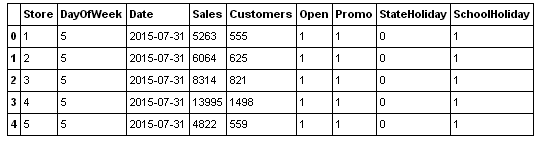

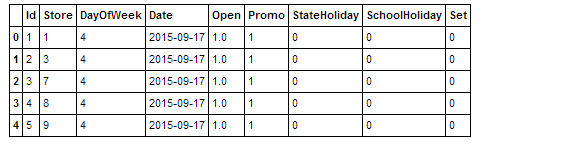

In [42]:
for name in names[:2]:
    display(Image('C:/Users/Administrator/Desktop/report/' + name, width=800))

#### 先探索一下销售额是否和处于一周的第几天有关,填补缺失值，默认周天以外的时间商店都是处于“open”状态，有如下图的情况,由此可以看出销售额与周几的一些关系

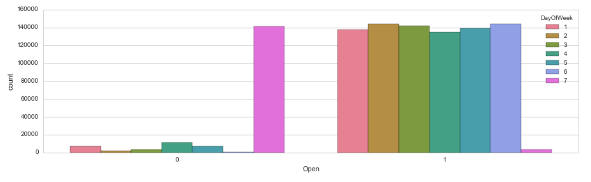

In [44]:
for name in names[2:3]:
    display(Image('C:/Users/Administrator/Desktop/report/' + name, width=1000))

#### 通过将时间数据进行清理，再探索一下销售额与时间（月）的关系，如下图所示展示了平均销售额与月份的关系以及百分比改变状况。

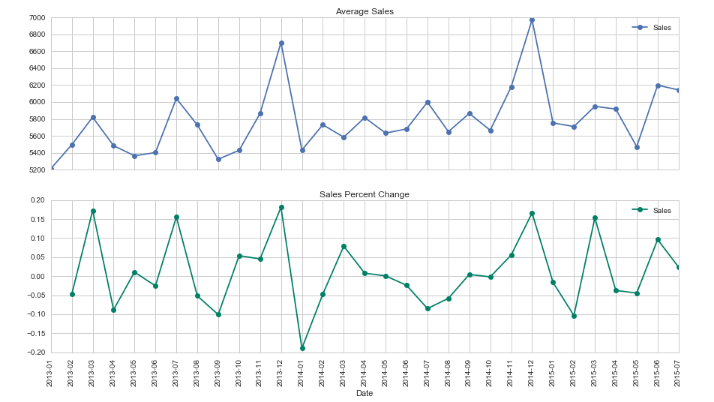

In [51]:
display(Image('C:/Users/Administrator/Desktop/report/' + "4.png", width=1000))

#### 这个图就比较清晰地表明了销售额与月份有着密切地关系，月份对于销售额比较大地影响。这个特征需要重视。

####  再比较年份的销售和每年到访的用户数量，如下图所示

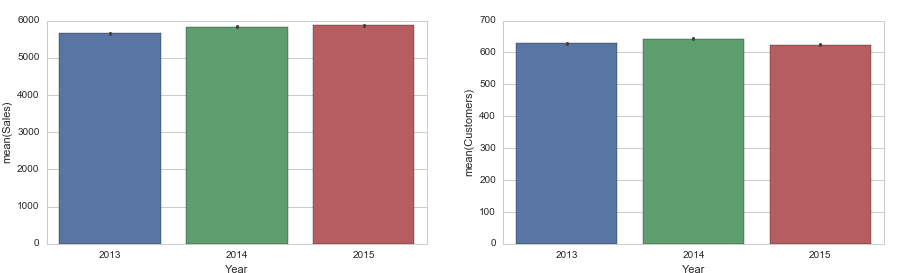

In [52]:
display(Image('C:/Users/Administrator/Desktop/report/' + "5.png", width=1000))

#### 从图中可以得知年份用户数量有一定关系，但关系不是很大

#### 接下来用box-plot和折线图分析下月份和用户数量的关系

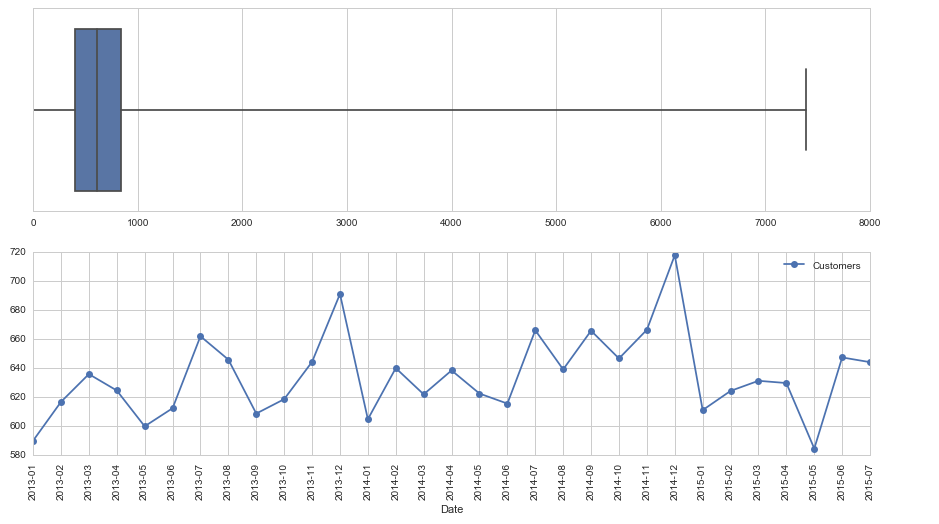

In [53]:
display(Image('C:/Users/Administrator/Desktop/report/' + "6.png", width=1000))

#### 由此可知用户数量和月份是紧密相关的，这个趋势图和月份与销售额的很像，这样就容易推理出，用户数量基本上决定了销售额。为了验证我们的想法，我们在更细小的时间段进行验证，下面我以星期为验证，看看用户和销售额的关系

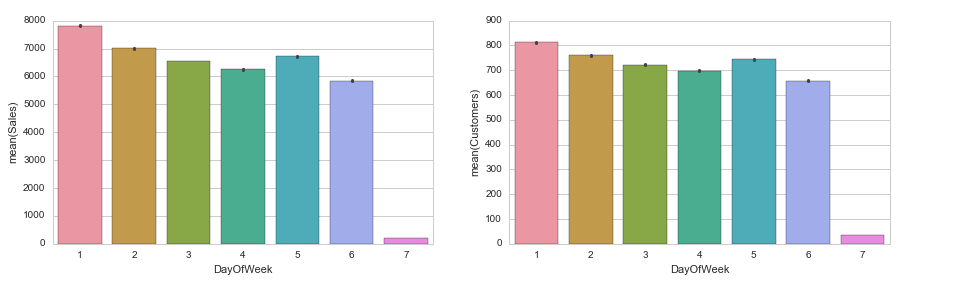

In [55]:
display(Image('C:/Users/Administrator/Desktop/report/' + "7.png", width=1000))

#### 由上图能非常明显的看出，我们的推理得到了验证：“销售额的变化基本是和用户数量的变化是一致的，百分比变化几乎完全一样”

#### 现在来看看促销对销售额与顾客数量是否明显的影响

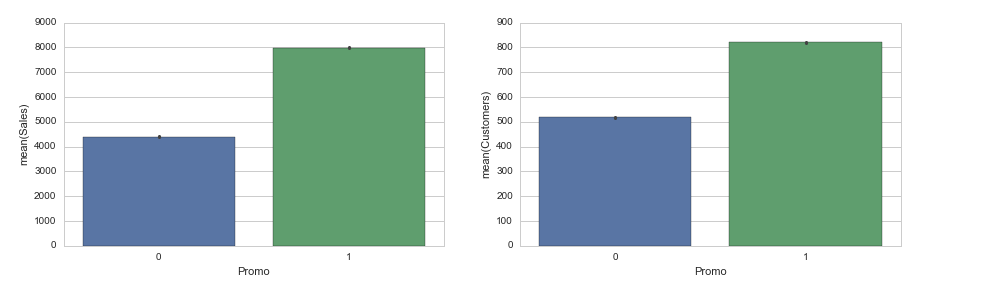

In [56]:
display(Image('C:/Users/Administrator/Desktop/report/' + "8.png", width=1000))

####  如图可知，促销对于顾客数量以及销售额都有着显著的影响，程度上来说，对于销售额的影响大于对用户数量的影响，因此可以推断出促销一定程度上能提升客单价。

#### 接下来可以看看a、b、c三种state假日在总天数中的占比情况，以及有无state对于销售额和用户的影响


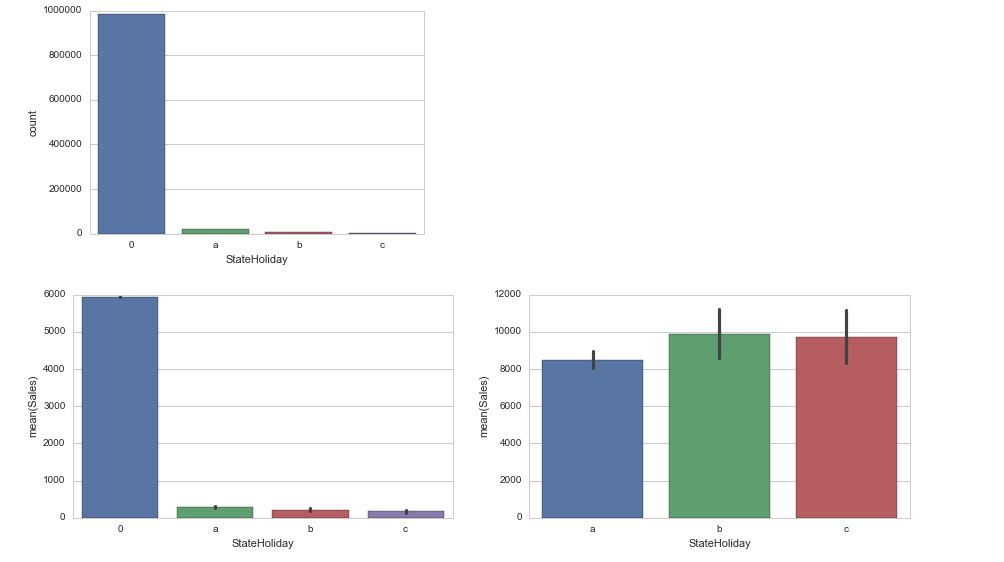

In [58]:
display(Image('C:/Users/Administrator/Desktop/report/' + "9.png", width=1000))

#### 接下来看看学校放假对于销售额和用户量的影响

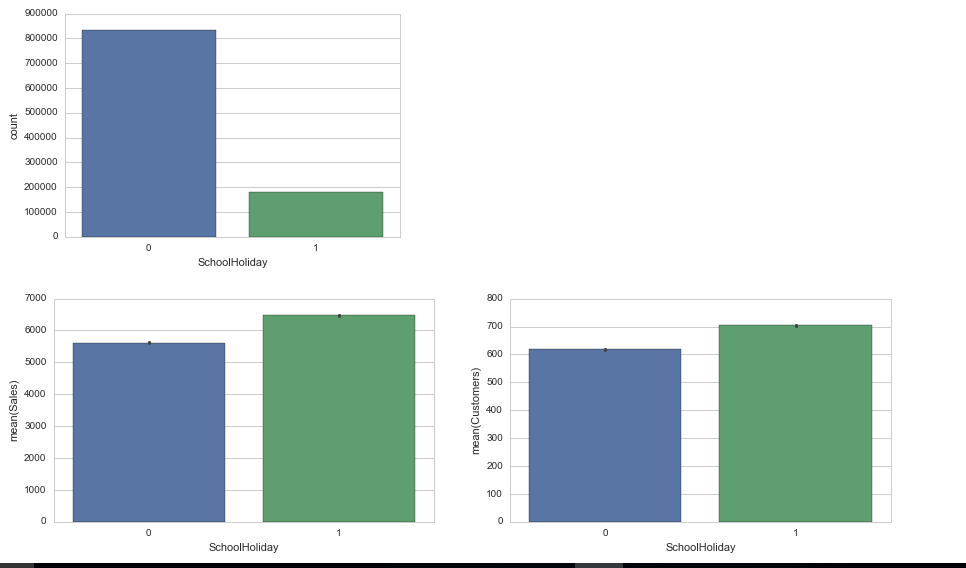

In [62]:
display(Image('C:/Users/Administrator/Desktop/report/' + "11.png", width=1000))

#### 然后可以再分析下客户量和销售额的关系，下图基本能大致说清楚客户数量与客单价的联系了

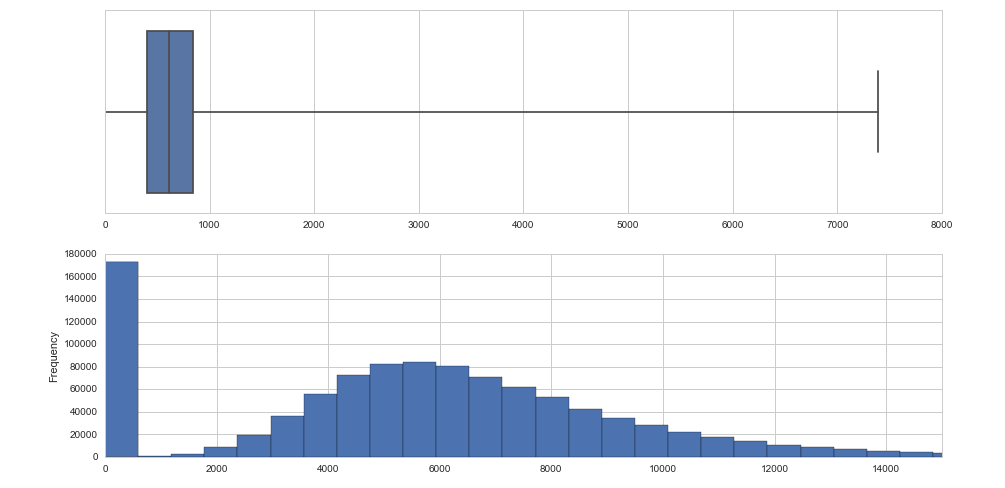

In [63]:
display(Image('C:/Users/Administrator/Desktop/report/' + "12.png", width=1000))

#### 由此其实可以推断过度的促销可能使得客单价偏低，有点得不偿失，因此应该控制好平衡。

#### 之后看看将“store”的各种特征合并到“train”后的一些情况，比如店铺不同类型的占比数量，以及不同类型店铺对于销售额和用户量的影响

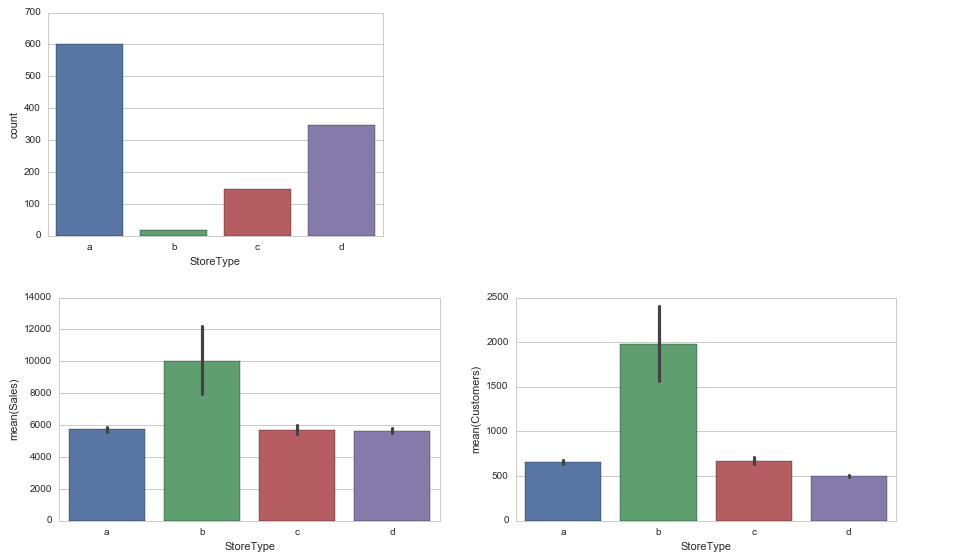

In [65]:
display(Image('C:/Users/Administrator/Desktop/report/' + "13.png", width=1000))

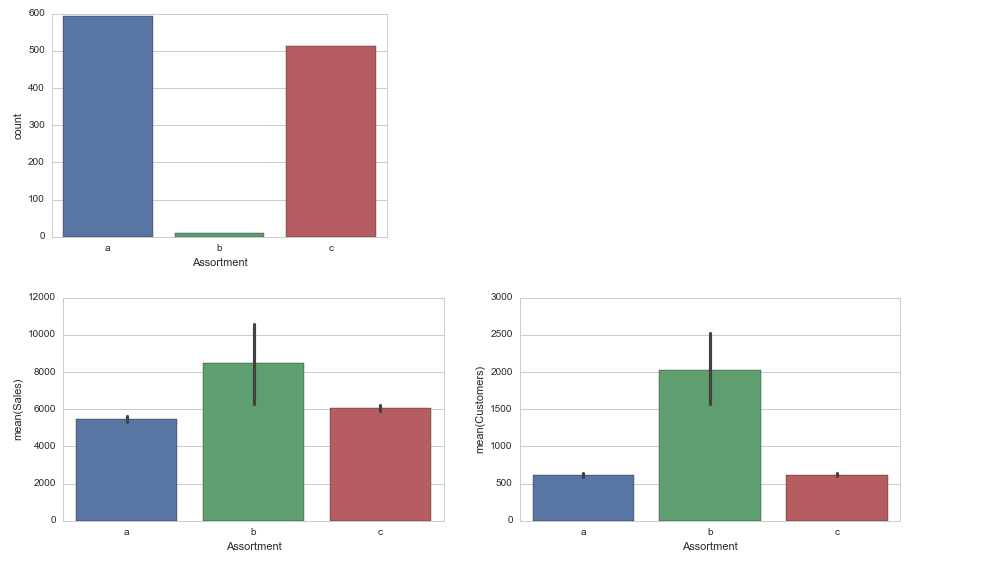

In [68]:
display(Image('C:/Users/Administrator/Desktop/report/' + "14.png", width=1000))

#### 长期促销销售额对于用户数量的影响，如下图

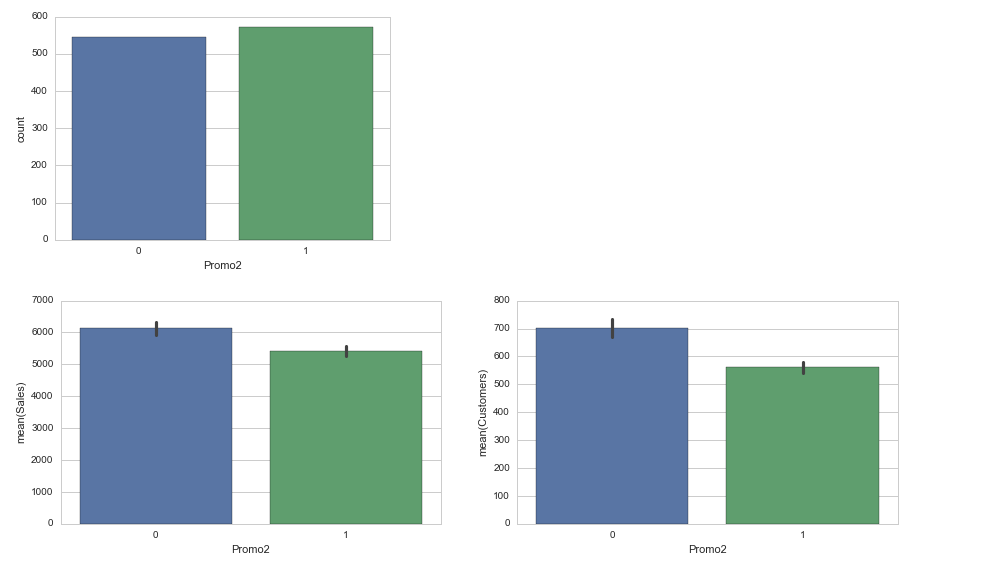

In [69]:
display(Image('C:/Users/Administrator/Desktop/report/' + "15.png", width=1000))

#### 然后再看一个比较关键的特征，一般竞争者们之间的距离和销售额的关系。形状比较像正态分布

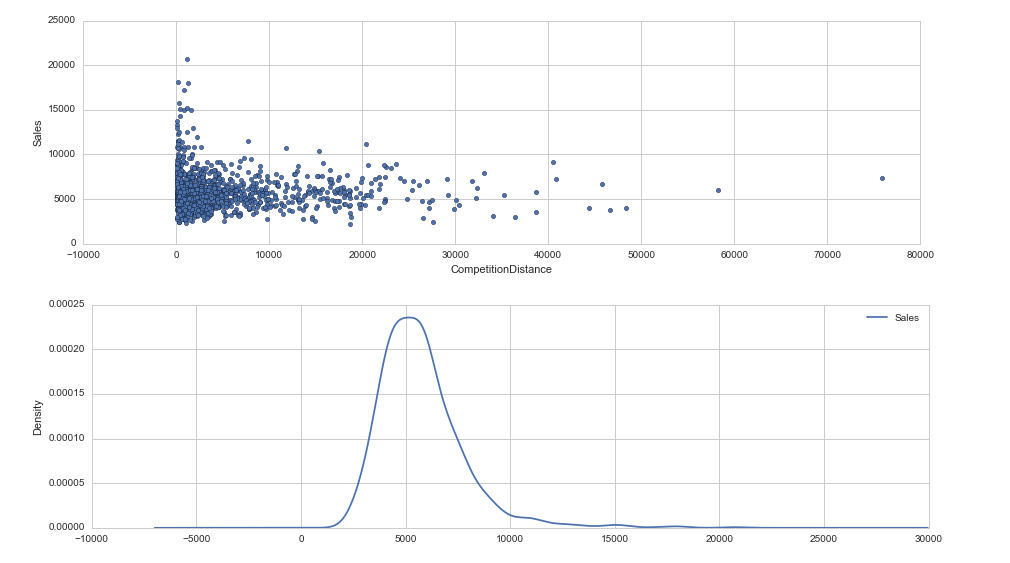

In [70]:
display(Image('C:/Users/Administrator/Desktop/report/' + "16.png", width=1000))

#### 竞争开始时，商店的平均销售额在一段时间内发生了什么事？ 我通过一个店铺进行了演示：store_id = 6的平均销售额自竞争开始以来急剧下降。

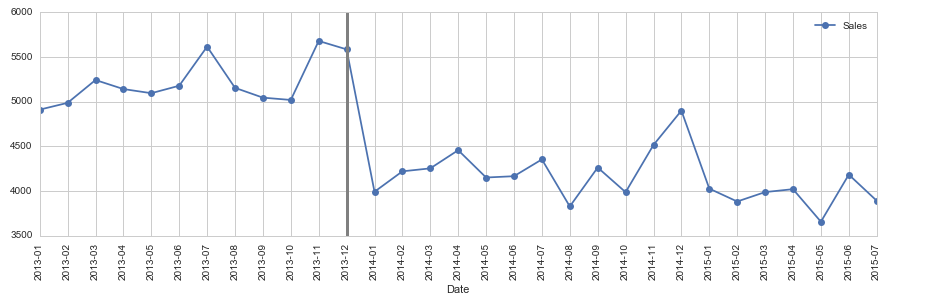

In [72]:
display(Image('C:/Users/Administrator/Desktop/report/' + "17.png", width=1000))

## 2.2算法与方法

先从特征开始讲起把：


从上述部分可以看出，仅通过使用客户数量数据或仅仅是促销是不能能预测销售的。销售受到每个属性的影响。为了对销售进行预测，首先我们将摆脱“客户”功能和“销售”功能中的异常值，因为数字过高或过低可能会出现异常情况。

这样的数据会影响模型的精度。处理异常值后，我们可以开始预处理数据。这包括摆脱Null值，encoding一些特征，如StoreType，StateHoliday等。
处理Missing Data是根据特征的现实意义进行填补和丢弃的，比如除每个星期天外，我都默认商店是处于“open”状态的，这比较符合我们的生活常识

如前所述，日期的转换对于预测而言是非常重要的，这也是视觉化中证明的，因为日期，月份和日期的销售变化很大。

我们也可以处理竞争的细节，因为它肯定会影响到真正影响销售的客户数量。促销可能有助于让客户回来，这就是为什么我们需要对所有Promo列进行编码的原因。一旦我们对数据进行了预处理，我们就可以使用cross_validation.train_test_split方法进行拆分。

该方法随机洗牌数据并返回两套训练和测试。可以定义测试的大小。然后，训练集用于训练几个模型 -


#### 模型上用到的相关方法：

* 我实验了大概好几种，分开来看，分别是 DecisionTree回归 ，GradientBoost回归，KNeighborsClassifier我进行了分别的测验，然后根据情况又进行了Ensemable，但最后还是别人造的轮子 xgboost更好用

-1. DecisionTree回归 - 该模型的目标是创建一个通过学习从数据特征推断的简单决策规则来预测目标变量的值的模型。 DecisionTree采用特征，并使用ifnd-else决策规则来获取目标变量的方法。

-2. Kneighbour回归 - 最近邻方法的原理是找到与新点最近距离最近的预定义数量的训练样本，并从它们预测标签。 K邻居回归基于每个查询点的k个最近邻居实现学习，其中k是用户指定的整数值。 Kneighbour的回归实例 - 

-3. GradientBoost回归 - 渐变增强回归是推广到任意可微分损失函数的推广。

梯度增强产生一个预测模型，它以弱预测模型（通常是决策树）的形式组成。它以像其他增强方法一样的阶段性方式构建模型，并且通过允许优化任意不同的损失函数来推广它们。

由于以下属性，这些模型已被选择用于此问题 - •考虑到影响销售的功能，数据可以轻松地分解为使用if-then-else决策规则对输入特征进行决策。这需要可以轻松完成的数据准备，所以我们不需要担心这里的主要缺点。

虽然决策树可能不稳定，但处理分类数据和数值也是非常好的。

因此，我们的数据集中的多种类型的功能将不会成为问题。我们可以通过查看模型的测试分数来确定是否对我们的数据不稳定，然后决定是否可以使用。 

•我们的数据集有大量的数据点。 Kneighbours使用强力执行快速计算，这有助于我们降低模型的成本。另一方面，仅在某些输入特征不是连续值的情况下才是有效的。我们可以通过测试分数找出影响模型准确性的程度。 

•GradientBoost是一个缓慢的模型，因此模型的成本将会很高。另一方面，它通过优化任意不可分解的损失函数使用不同的方法。如果我们无法通过任何其他模型获得良好的成绩，我们可以通过这种方法获得良好的成绩。

## 2.3基准

考虑到我们将要尝试3个以上的模型，我期望一个模型具有良好的RMSE分数，注意在RMSE的情况下越低越好，0是完美的分数。 

对销售有一个好主意，商店经理需要对模型的准确性有一定的信念。 

可以接受一定的错误率，但如果误差几乎达到五分之一，那么该模型是不错的。 有经验的店经理将能够预测那么多错误率。 如果模型没有正确地预测至少五分之一的数据，则数据需要更多的处理，并且所选择的模型需要被优化或改变。 因此，RMSE的基准应为0.20



# 三、方法

首先我们首先处理异常值。 检测数据中的异常值在任何数据预处理步骤中都非常重要的分析。
异常值的存在常常会使结果不好

考虑到这些数据点。 有很多“规则“是什么构成数据集中的异常值？
使用Tukey's方法来识别异常值：离群值是计算为四分位数范围（IQR）的1.5倍。 数据点具有超出IQR之外的异常值的功能该功能被认为是异常的。

因此，我写了一个代码，用可视化的方法辅助，发现客户和中的异常值
销售，然后看到哪些异常值在这两个特征中是常见的。然后常见的异常值被丢弃。 

如前所述，数据需要适量的处理。直接使用一些具有数值的功能 - “存储”，“竞争力”，“促销”，“促销2”，“学校”。处理数据的初始步骤是用零填充所有的NaN值。


这里我们假设列没有被填写，因为该特征的abcense。然后为了加快处理速度，我放弃了商店关闭的行，这就是开放设置为零的地方，因为我们只想在商店开放的日子里培训模型，因此有销售。那么具有分类值“StoreType”，“Assortment”和“StateHoliday”的特征具有可以在模型中使用的替代值的所有值。之后，我们转到日期。给出的日期格式是aribtrary，需要处理。

因此，所有的日期都被分为“DayOfWeek”，“Month”，“Day”，“Year”，“WeekOfYear”的功能。然后处理以年或月为单位的竞赛特征的日期。我们将所有的值转换成几个月，以便有一个单位进行比较。

在“PromoOpen”这一年以来，从星期以来给出了同样的步骤。最后，“IsPromoMonth”映射为月份值，并根据该值分配0和1。为了使模型创建更快一点，销售为0的所有行都将被删除，因为它可能是一个未填充的值，这只会对模型产生负面影响。

## 3.2 实施

实施首先，将步骤分为各种功能，以计算每个功能为检查成本所花费的时间。

第一个函数列出它所用的分类器作为参数。它适用于拟合方法并报告时间。

然后第二个函数运行训练集本身的预测，并返回均方根误差率。它还返回了对训练集进行预测所需的时间。然后第三个函数对测试集进行预测，并报告时间和分数。

首先，将销售数据转换为日志值，以便更容易预测。然后，前面部分提到的每个模型都被调用并作为函数的参数传递，并为每个函数报告时间和分数。一旦报告了分数，则选择最有效的模型并计算特征重要性。功能重要性告诉我们哪些功能在做出预测时最相关。这可以与我们的分析进行比较，同时探索数据。然后在条形图上表示特征重要性。

然后将整个数据集训练在所选择的模型上，最后的预测被做出并保存到测试文件中。

选择细化决策回归。 最初，错误率很高。 因此，将模型训练的销售数据转换为日志以降低错误率。 测试组的均方误差值为0.1819，远高于预期值。 然后通过应用GridSearchCV，错误率降低到0.164。 GridSearchCV详尽地考虑了在参数网格中传递的所有参数组合。 在这种情况下，优化了决策树算法的叶样本和样本分割值，以获得最佳分数。

# 四、结果

### 4.1模型评估和验证

### 决策树回归器使用392592的训练集大小来训练DecisionTreeRegressor。 。
* 训练用去6.3615秒
* 做出预测在0.6946秒。 
* 训练集的mean_squared_error：0.0000。 
* 在0.1140秒内做出预测。 
* 测试集的mean_squared_error：0.1819。 



### 使用训练集大小为392592的Kneighbours培训KNeighborsRegressor。 。 
* 训练用去在3.6165秒
* 在23.1225秒内做出预测。 
* 训练集的mean_squared_error：0.1927。 
* 在5.8234秒内做出预测。 
* 测试集的mean_squared_error：0.2470。


### 对于GradientBoost回归器，使用训练集大小为392592的一个GradientBoostingRegressor进行训练。

 * 训练用去71.3005秒
 * 做出预测在1.1283秒。 
 * 训练集的mean_squared_error：0.3151。
 * 在0.2588秒内做出预测。 
 * 测试集的mean_squared_error：0.3181。

## 4.2理由：

### 分析

* 在Kneighbour的情况下，模型的成本低于预期，错误率低于所确定的基准值。 这是一个很好的模型，但是错误率相对高于DecisionTree模型，因此该模型不用于最终预测。


* GradientBoost回归器具有极高的训练成本，预期的模型也能提供最高的误码率。 该模型不被分类为最优模型。 DecisionTree回归是明确的赢家，它的错误率最低，训练时间不会太长。 即使训练时间高于Kneighbours，预测时间要低得多。


* RMSE的基准值为0.33，该模型的值为0.18，更好。 从而使DecisionTree成为最优的模型。 在通过网格搜索优化DecisionTree后，模型的误码率降至0.16。

### 具体的理由

在上一节中，错误率的基准值几乎为0.20。 由于DecisionTree回归，错误率几乎是预期值的三分之二。 如果可以预测销售额的错误率只有0.16，

那么管理者很容易做出必要的改变，看看是什么增加或减少了销售。 

DecisonTree回归创建了一个模型，通过学习从数据特征推断出的简单决策规则来预测销售额的价值。 错误是如此之低，因为每个功能都被应用，如果另外决定规则来预测销售，并且由于功能和数字以及分类的模型是完美契合。 

因此，对整个数据集进行了最后的训练，并且预测了测试集的销售。 可以肯定地说，这个模型将精确地预测所需的值。 因此，这个项目的任务已经完成了！

# 五，结论


自由形式可视化最后，当最优模型被训练时，我们可以看到哪些特征是影响最重要性的特征，并评估我们在本项目前期的预测。 让我们看看重要性

### 5.1特征重要性可视化分析

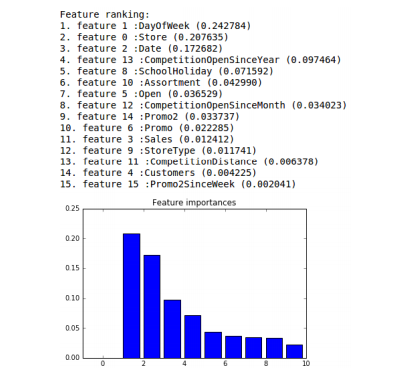

In [5]:
display(Image('C:/Users/Administrator/Desktop/report/' + "19.png", width=1000))

如图所见，商店，DayOfWeek和Date是最重要的feature，似乎在销售上有最大的差异。 这个预测是正确的。 另一方面，假期和促销也似乎有很大的差异，但这些特征已经被降低了

这里有我后来用xgboost实现了低于0.1的error的时候进行的特征的分析，和上面的结果有较显著的区别，如下图所示。尤其是排名3-10的特征，在xgboost运算后明显有了更大的权重，也就是说，xgboost更具有发现特征对于预测结果的能力，不像单模型那样过于简单，靠常识也能知道过于依赖某个特征可信度会有比较大风险。所以最后结果也自然有了区别

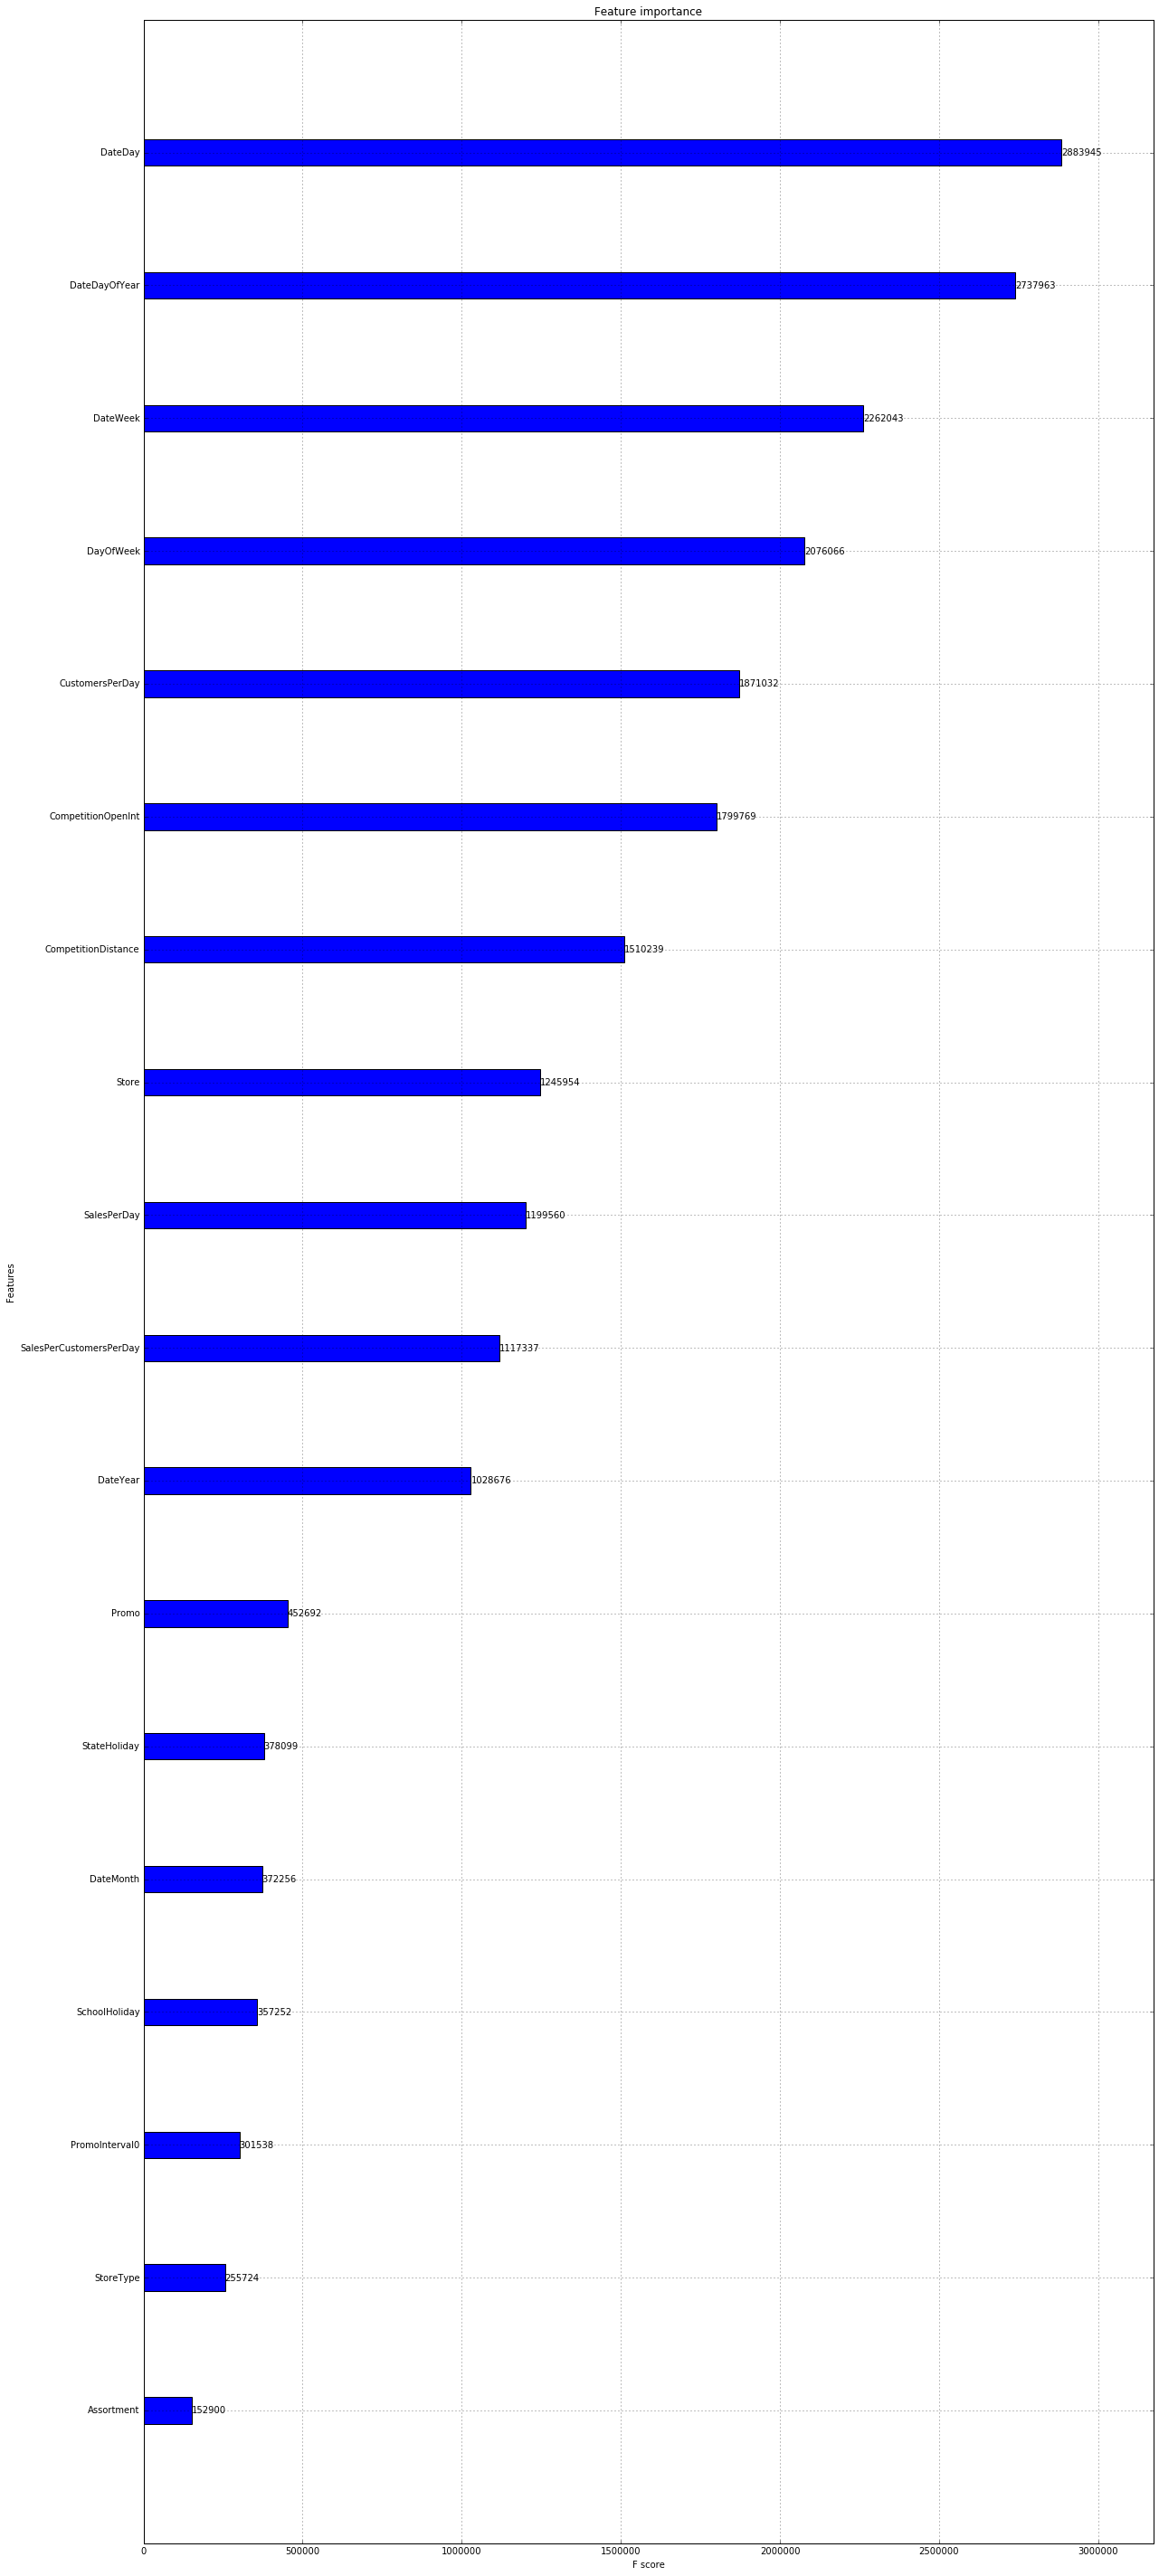

In [6]:
display(Image('C:/Users/Administrator/Desktop/report/' + "20.png", width=1000))

### 5.2思考

项目的分析最初是项目的一个有意义的部分，因为它能够告诉我们哪个功能会影响销售，几乎和DecisionTree回归函数的feature_importance属性一样。 

由于数据未进行预处理，因此在数据可视化方面存在困难。 

数据中有很多NaN值在几乎每个阶段都在降低产出的质量。 

我预计最终的模型要花费更少的时间，但训练时间不是以小时计算的话根本不重要。 

优化模型是一个挑战，因为处理的索引错误（如代码中所述）。 现在这个模型可以用于预测销售，即使有更多的商店或不同的业务来了，如果有类似的功能，那么这个模型可以用于适当的预测


### 如何将模型应用在商业上

#### 理想的方法是（需要检查与业务，看看我们是否需要包括他们的任何一个实施以下方法的制约因素）
* 与业务核实我们需要多长时间才能从生产中刷新该模型状态。
* 开发端到端管道，采用来自所有1115家商店的综合销售数据做数据预处理，特征工程，然后训练模型（使用CV验证方法），并根据刷新频率输出预测
* 管道应能够持续整合新数据（每天/每周）和帮助预测在包括新数据在内的训练模型时，尽可能准确。
* 应将报告发送给每个店主，以了解他未来6周的具体店铺预测

### 5.3优化

项目的分析最初是项目的一个有意义的部分，因为它能够告诉我们哪个功能会影响销售，几乎和DecisionTree回归函数的feature_importance属性一样。


优化模型是一个挑战，因为处理的索引错误（如代码中所述）。 现在这个模型可以用于预测销售，即使有更多的商店或不同的业务来了，如果有类似的功能，那么这个模型可以用于适当的预测


#### 可以参见我用xgboost做出的结果，因为主要是去调参和之前需要实验的一些特征工程，所以此处不会详细分析，具体内容可以去看看代码。此处我会贴一些最后的截图。第一次不怎么会调参，第二次看了一些博客后有了显著的提升。下面是最终结果

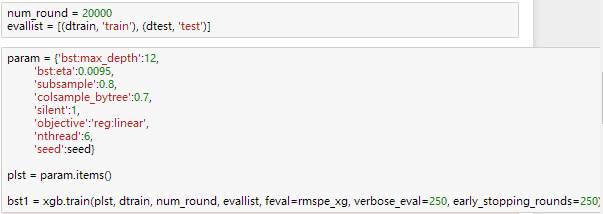

In [8]:
display(Image('C:/Users/Administrator/Desktop/report/' + "21.png", width=1000))

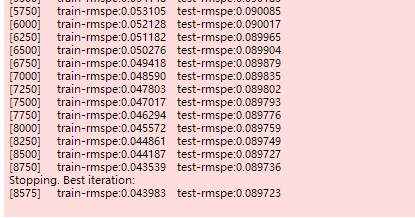

In [9]:
display(Image('C:/Users/Administrator/Desktop/report/' + "22.png", width=1000))

##                                                                                      -Thanks for reading

那个最后一版的xgboost算了大概有4-5个小时才弄完